In [1]:
import os
import re
import pandas as pd
import numpy as np

In [2]:
# Movemos el directorio activo a una nueva localización para este dataset
## Retrocedemos un nivel
%cd ..
## Creamos carpeta
!mkdir /content/air_quality_dataset
## Movemos directorio activo
%cd /content/air_quality_dataset
# Descargamos fichero comprimido
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip
# Descargamos el fichero que contiene los datos a nuestro directorio activo
!unzip PRSA2017_Data_20130301-20170228.zip
# Nos movemos a la carpeta que contenía el zip
%cd PRSA_Data_20130301-20170228

/
/content/air_quality_dataset
--2022-07-11 11:00:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7959991 (7.6M) [application/x-httpd-php]
Saving to: ‘PRSA2017_Data_20130301-20170228.zip’

PRSA2017_Data_20130 100%[===================>]   7.59M  --.-KB/s    in 0.1s    

2022-07-11 11:00:11 (65.9 MB/s) - ‘PRSA2017_Data_20130301-20170228.zip’ saved [7959991/7959991]

Archive:  PRSA2017_Data_20130301-20170228.zip
   creating: PRSA_Data_20130301-20170228/
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv  
  inflating: PR

In [3]:
china =pd.concat([pd.read_csv(elem) for elem in os.listdir()]).reset_index(drop=True)

Detalles del data 

1. No: Row number 
2. year: Year of data in this row 
3. month: Month of data in this row 
4. day: Day of data in this row 
5. hour: Hour of data in this row 
6. PM2.5: PM2.5 concentration (ug/m^3) 
7. PM10: PM10 concentration (ug/m^3) 
8. SO2: SO2 concentration (ug/m^3) 
9. NO2: NO2 concentration (ug/m^3) 
10. CO: CO concentration (ug/m^3) 
11. O3: O3 concentration (ug/m^3) 
12. TEMP: Temperature (degree Celsius) 
13. PRES: Pressure (hPa) 
14. DEWP: Dew point temperature (degree Celsius) 
15. RAIN: Precipitation (mm) 
16. wd: Wind direction 
17. WSPM: Wind speed (m/s) 
18. station: Name of the air-quality monitoring site 

In [4]:
china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [5]:
china.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping

In [6]:
china.tail()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
420763  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
420764  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
420765  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
420766  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
420767  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
420763  12.5  1013.5 -16.2   0.0   NW   2.4  Aotizhongxin  
420764  11.6  1013.6 -15.1   0.0  WNW   0.9  Aotizhongxin  
420765  10.8  1014.2 -13.3   0.0   NW   1.1  Aotizhongxin  
420766  10.5  1014.4 -12.9   0.0  NNW   1.2  Aotizhongxin  
420767   8.6  1014.1 -15.9   0.0  NNE   1.3  Aotizhongxin

Ahora elimino la columna Nº y viento porque los valores que muestra no me sirven para mi estudio, ya que, me centraré en otros datos.

In [7]:
china.drop(['No', 'wd'], axis=1, inplace=True)

Aquí veo los valores nulos en las columnas y cuantos hay

In [8]:
china.isnull().sum()

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
WSPM         318
station        0
dtype: int64

Realizo la media y mediana de los valores.

In [9]:
china['PM2.5'].fillna(china['PM2.5'].mean(), inplace=True)
china['PM10'].fillna(china['PM10'].mean(), inplace=True)
china['SO2'].fillna(china['SO2'].mean(), inplace=True)
china['NO2'].fillna(china['NO2'].mean(), inplace=True)
china['CO'].fillna(china['CO'].mean(), inplace=True)
china['O3'].fillna(china['O3'].mean(), inplace=True)
china['TEMP'].fillna(china['TEMP'].median(), inplace=True)
china['PRES'].fillna(china['PRES'].median(), inplace=True)
china['DEWP'].fillna(china['DEWP'].mean(), inplace=True)
china['RAIN'].fillna(china['RAIN'].median(), inplace=True)
china['WSPM'].fillna(china['WSPM'].median(), inplace=True)

Veré los datos medios y su desviación mediante describe y también me dará los valores min y max.

In [10]:
china.describe()

year          month            day           hour  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean     2014.662560       6.522930      15.729637      11.500000   
std         1.177198       3.448707       8.800102       6.922195   
min      2013.000000       1.000000       1.000000       0.000000   
25%      2014.000000       4.000000       8.000000       5.750000   
50%      2015.000000       7.000000      16.000000      11.500000   
75%      2016.000000      10.000000      23.000000      17.250000   
max      2017.000000      12.000000      31.000000      23.000000   

               PM2.5           PM10            SO2            NO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       79.793428     104.602618      15.830835      50.638586   
std        79.978679      91.066422      21.417257      34.618463   
min         2.000000       2.000000       0.285600       1.026500   
25%        21.000000      36.000000       3.000000      24.000000   
50%        57.000000      84.000000       8.000000      45.000000   
75%       109.000000     144.000000      19.000000      70.000000   
max       999.000000     999.000000     500.000000     290.000000   

                  CO             O3           TEMP           PRES  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean     1230.766454      57.372271      13.539885    1010.746658   
std      1131.283304      55.760484      11.430768      10.469168   
min       100.000000       0.214200     -19.900000     982.400000   
25%       500.000000      12.000000       3.100000    1002.300000   
50%       900.000000      47.000000      14.500000    1010.400000   
75%      1500.000000      80.000000      23.200000    1019.000000   
max     10000.000000    1071.000000      41.600000    1042.800000   

                DEWP           RAIN           WSPM  
count  420768.000000  420768.000000  420768.000000  
mean        2.490822       0.064416       1.729461  
std        13.787240       0.820626       1.245947  
min       -43.400000       0.000000       0.000000  
25%        -8.900000       0.000000       0.900000  
50%         3.000000       0.000000       1.400000  
75%        15.100000       0.000000       2.200000  
max        29.100000      72.500000      13.200000

A continuación, veré la correlación de los datos, mediante histogramas.

In [11]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f880ba81a10>,
      dtype=object)

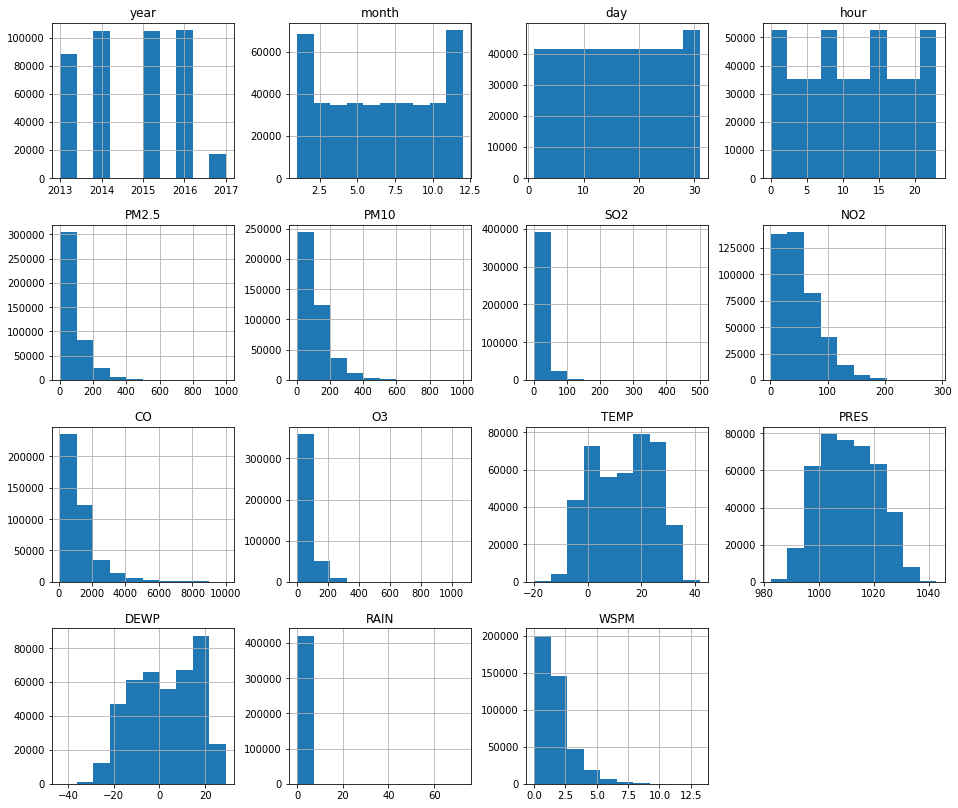

In [12]:
china.hist(figsize=(16,14))

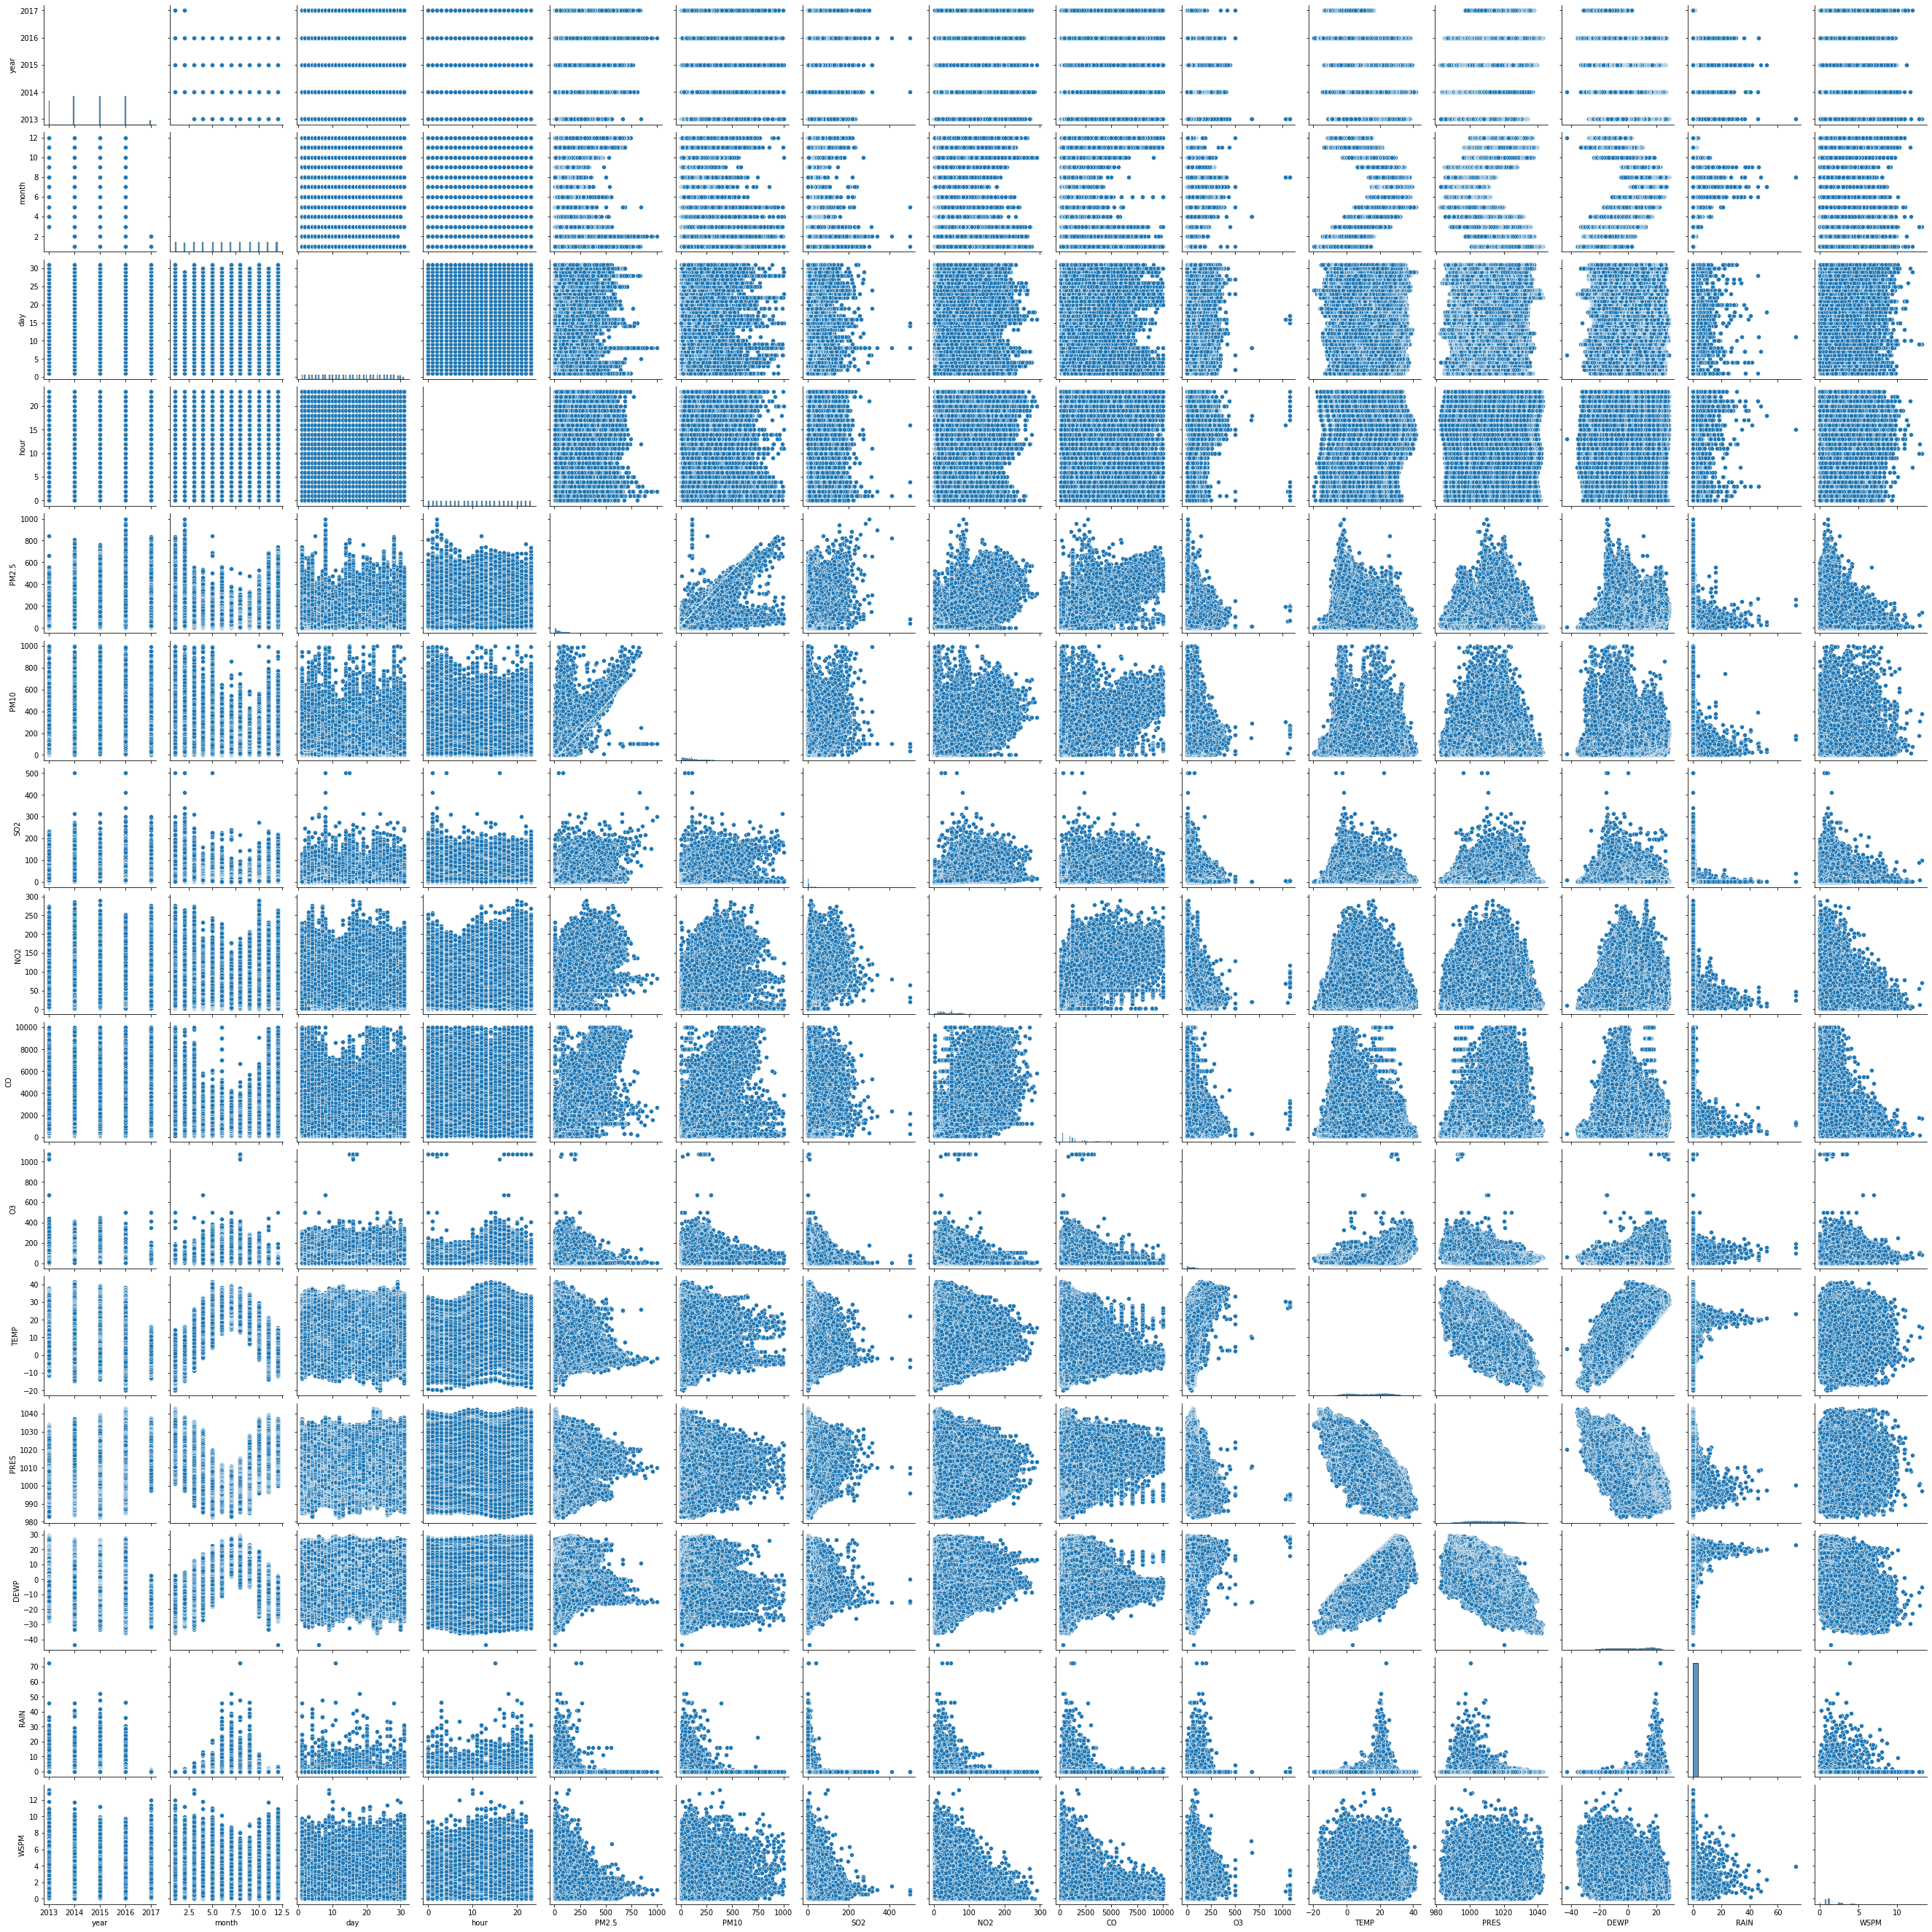

In [13]:
import seaborn as sns
%matplotlib inline
sns.pairplot(china)

se ven como están distribuidos los datos y si hay valores fuera de rango,en caso de ser así, usaré la correlación Spearman.

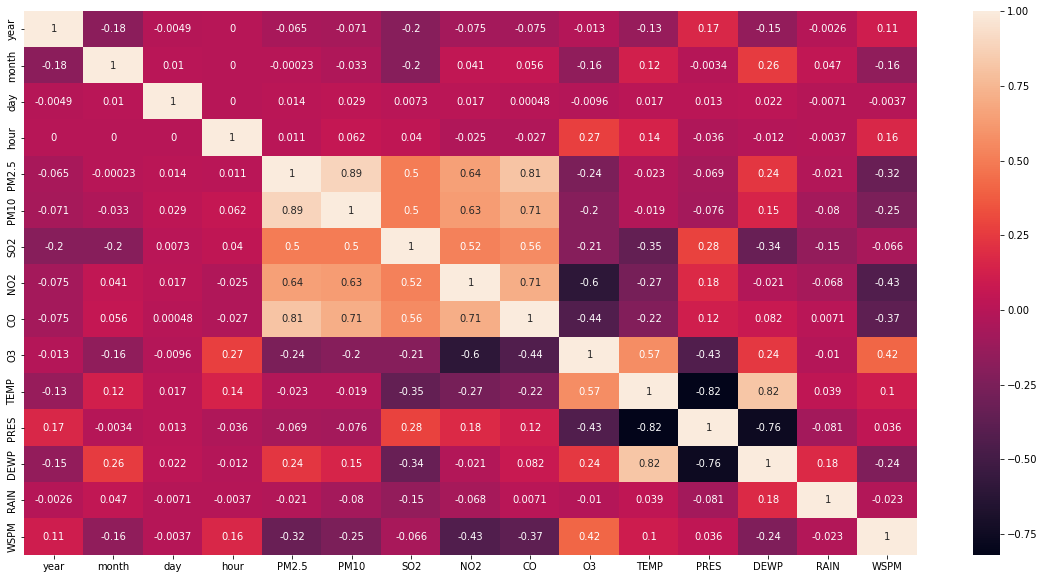

In [14]:
china_spearman= china.corr(method= "spearman")
plt.figure(figsize=(20,10))
sns.heatmap(china_spearman, annot=True)

Aquí quiero ver por año y temperatura las micropartículas de PM2.5 y PM10 

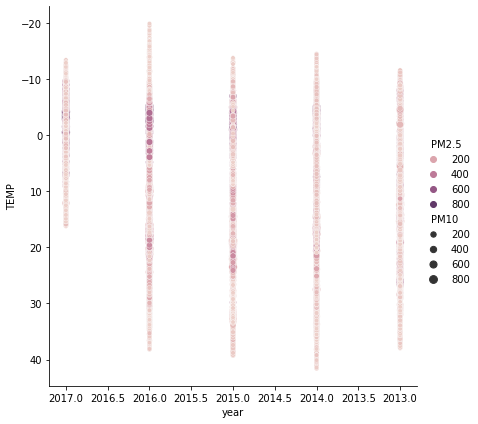

<Figure size 1440x720 with 0 Axes>

In [15]:
g = sns.relplot(data = china, x = 'year', y = 'TEMP', hue = 'PM2.5', size = 'PM10', height = 6)
g.fig.axes[0].invert_yaxis()
g.fig.axes[0].invert_xaxis()
plt.figure(figsize=(20,10))
plt.show()

Ahora realizo una nueva función porque quiero ver los niveles de contaminación por años y agrupo, además de realizar la mediana para que me de el valor medio de los datos. 

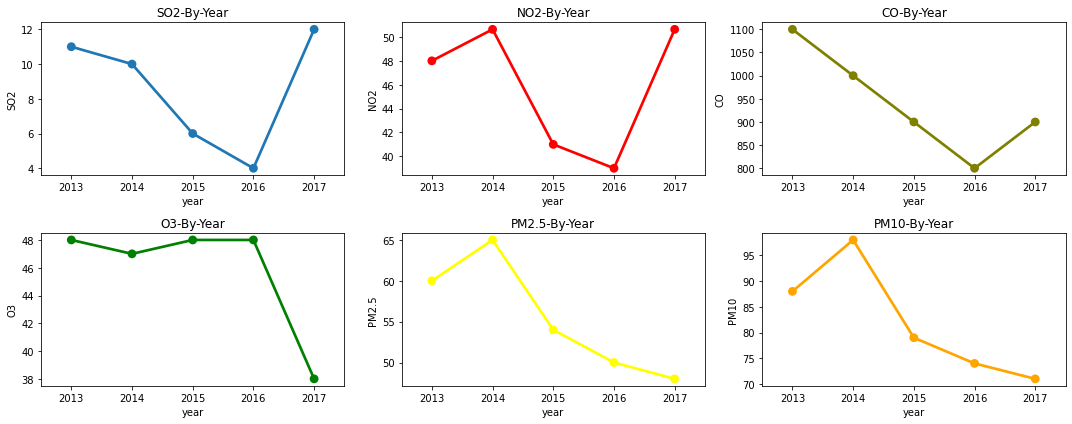

In [16]:
df = china[['SO2','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
fig,ax=plt.subplots(2, 3,figsize=(15,6))
ax[0, 0].set_title('SO2-By-Year')
sns.pointplot(ax= ax[0,0],x='year', y='SO2', data=df)

df = china[['NO2','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[0, 1].set_title('NO2-By-Year')
sns.pointplot(ax= ax[0,1], x='year', y='NO2', data=df,markers='o', color='red')

df = china[['CO','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[0, 2].set_title('CO-By-Year')
sns.pointplot(ax= ax[0,2],x='year', y='CO', data=df,markers='o', color='olive')

df = china[['O3','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 0].set_title('O3-By-Year')
sns.pointplot(ax=ax[1, 0], x='year', y='O3', data=df,markers='o', color='green')


df = china[['PM2.5','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 1].set_title('PM2.5-By-Year')
sns.pointplot(ax=ax[1, 1],x='year', y='PM2.5', data=df,markers='o', color='yellow')


df = china[['PM10','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 2].set_title('PM10-By-Year')
sns.pointplot(ax=ax[1,2], x='year', y='PM10', data=df,markers='o', color='orange')
fig.tight_layout()